In [1]:
#import MetaTrader5 as mt5
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pandas as pd
import datetime as dt
import numpy as np
from IPython.display import clear_output
import math
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#from itertools import combinations_with_replacement
#from itertools import combinations
import data as dt
import analysis_functions as af
import backtest as bt
import indicators as indi

plt.rcParams["figure.figsize"] = (30,10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ModuleNotFoundError: ignored

In [ ]:
mt5.initialize()
if not mt5.initialize(login=40305620,password='x8dcteyv',server='MetaQuotes-Demo'):
    print('MT5 não iniciado.')
    mt5.shutdown()

# D1 2600
# H1 63000
data = dt.get_data(0,2650,mt5.TIMEFRAME_D1, periods=1)
#data = dt.pct_data_signals(data)

smothing1 = 21
smothing2 = 15
smothing3 = 8
data['eur_pmo'], data['eur_signal'] = indi.PMO(data['eur'],smothing1,smothing2,smothing3)
data['usd_pmo'], data['usd_signal'] = indi.PMO(data['usd'],smothing1,smothing2,smothing3)
data['gbp_pmo'], data['gbp_signal'] = indi.PMO(data['gbp'],smothing1,smothing2,smothing3)
data['jpy_pmo'], data['jpy_signal'] = indi.PMO(data['jpy'],smothing1,smothing2,smothing3)
data['cad_pmo'], data['cad_signal'] = indi.PMO(data['cad'],smothing1,smothing2,smothing3)
data['aud_pmo'], data['aud_signal'] = indi.PMO(data['aud'],smothing1,smothing2,smothing3)
data['nzd_pmo'], data['nzd_signal'] = indi.PMO(data['nzd'],smothing1,smothing2,smothing3)
data['chf_pmo'], data['chf_signal'] = indi.PMO(data['chf'],smothing1,smothing2,smothing3)
data = dt.pmo_signals(data, signal=True)

mt5.shutdown()

True

In [ ]:
data.isna().sum().sum()

40

In [ ]:
walk1, test1, walk2, test2, walk3, test3, walk4, test4, walk5, test5, final = dt.walk_forward_split(data)
risk = 0.01

Dados tem len de 2650 e o split tem len de 2650.


# Test 1

50/50


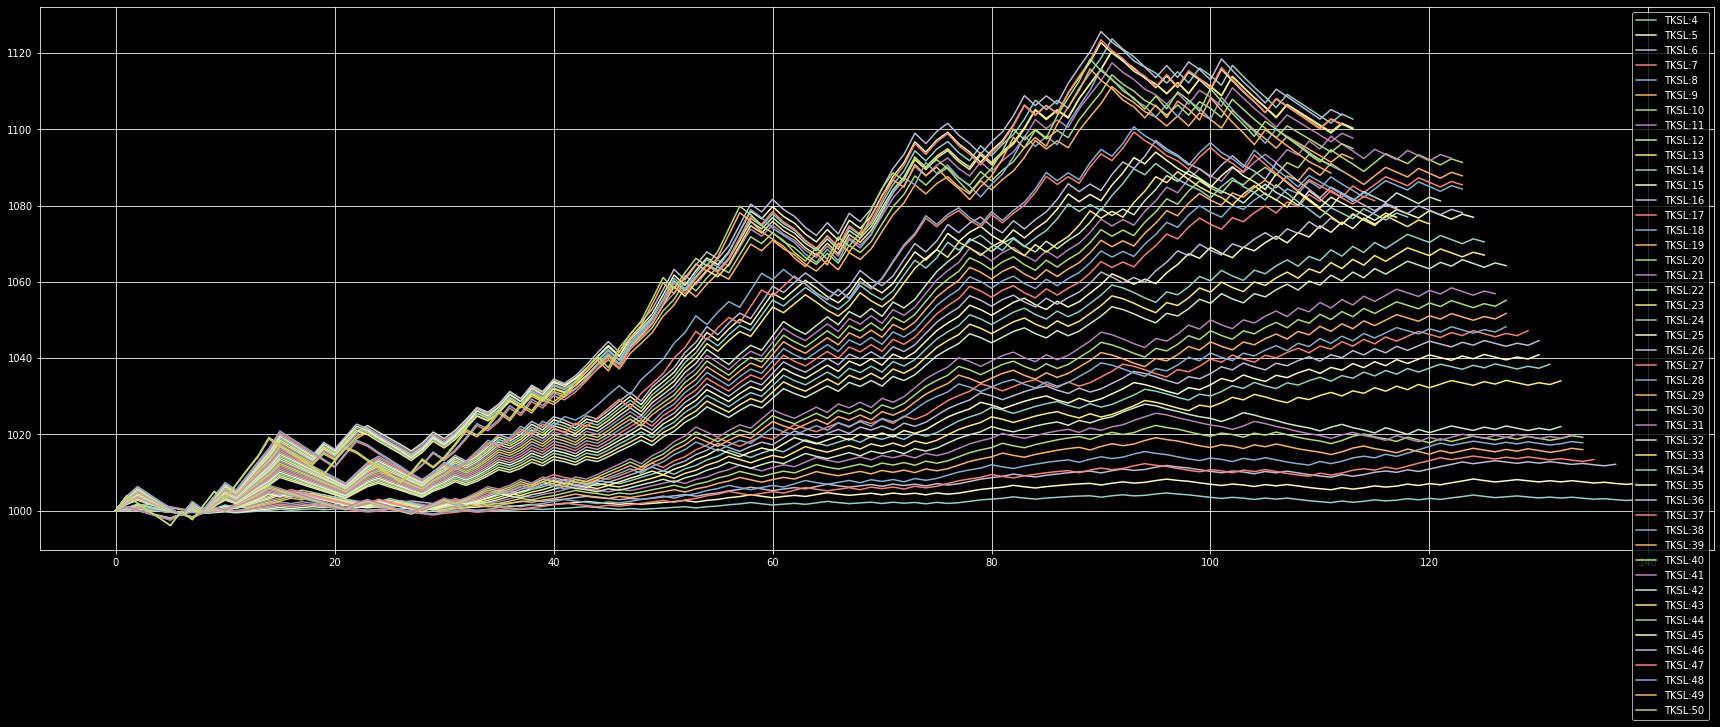

In [ ]:
test_walk1 = bt.pct_backtest(walk1, risco=risk, single=False, tot=51)
test_walk1.iloc[:,:-1].plot()
plt.grid()

46/47


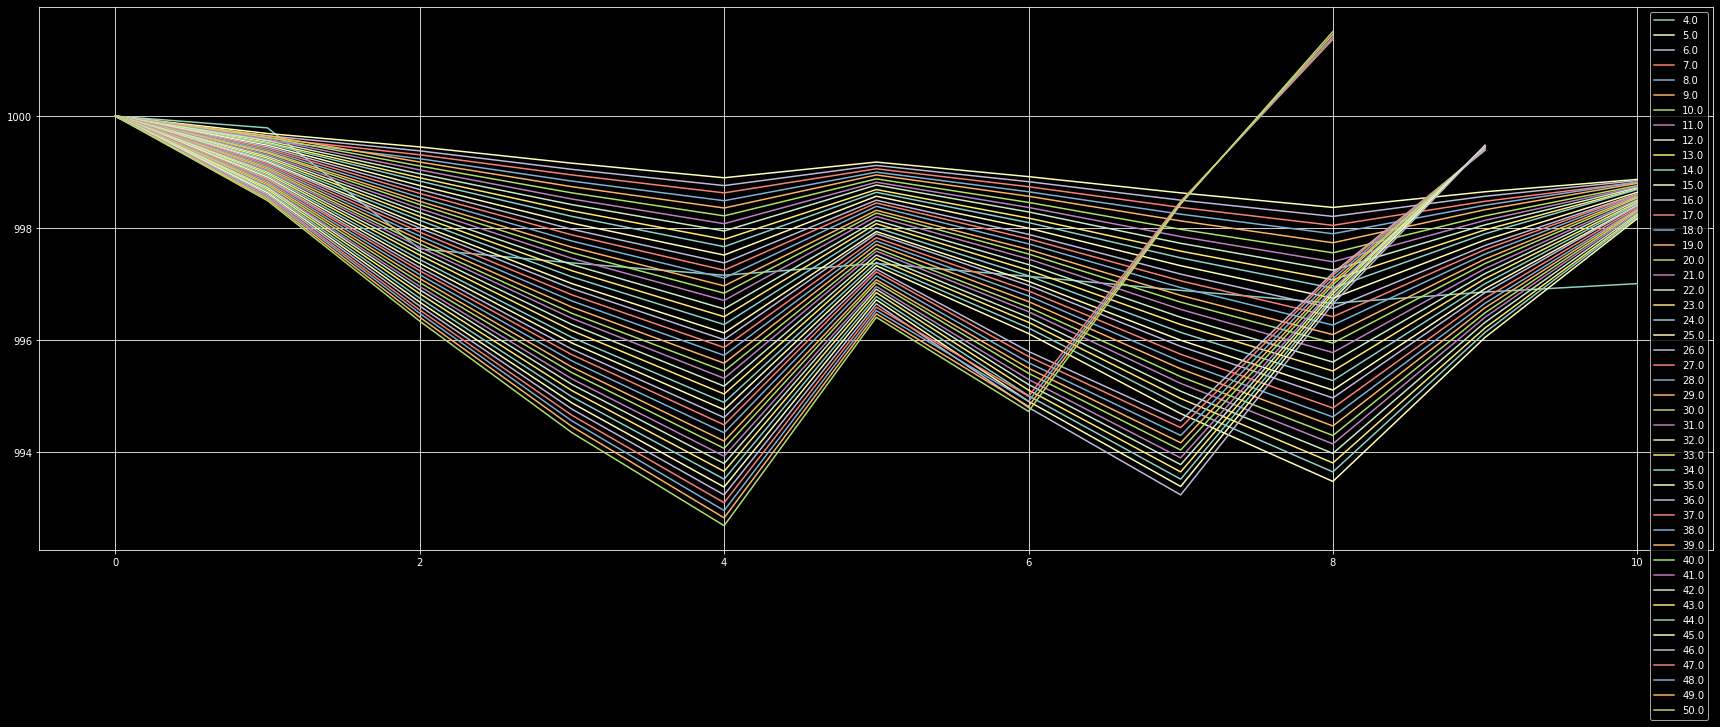

In [ ]:
walk1_test1_test = pd.DataFrame()
for i in range(len(test_walk1.iloc[:,-1].dropna())):
    clear_output(wait=True)
    print(f'{i}/{len(test_walk1.iloc[:,-1].dropna())}')
    result_test1 = bt.pct_backtest(test1, risco=risk, tksl=test_walk1['best_tksl'].iloc[i])
    walk1_test1_test[f"{test_walk1['best_tksl'].iloc[i]}"] = result_test1['result']
walk1_test1_test.plot()
plt.grid()

# Test 2

50/50


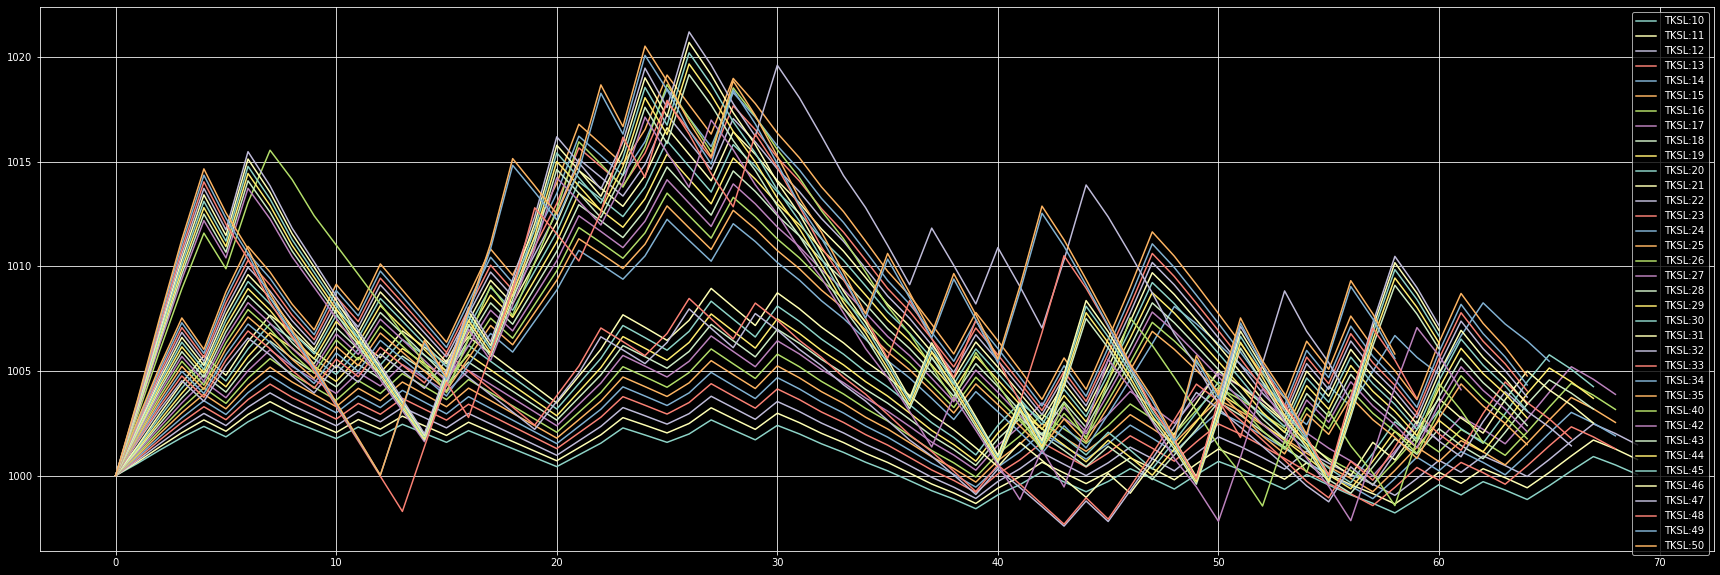

In [ ]:
test_walk2 = bt.pct_backtest(walk2, risco=risk, single=False, tot=51)
test_walk2.iloc[:,:-1].plot()
plt.grid()

35/36


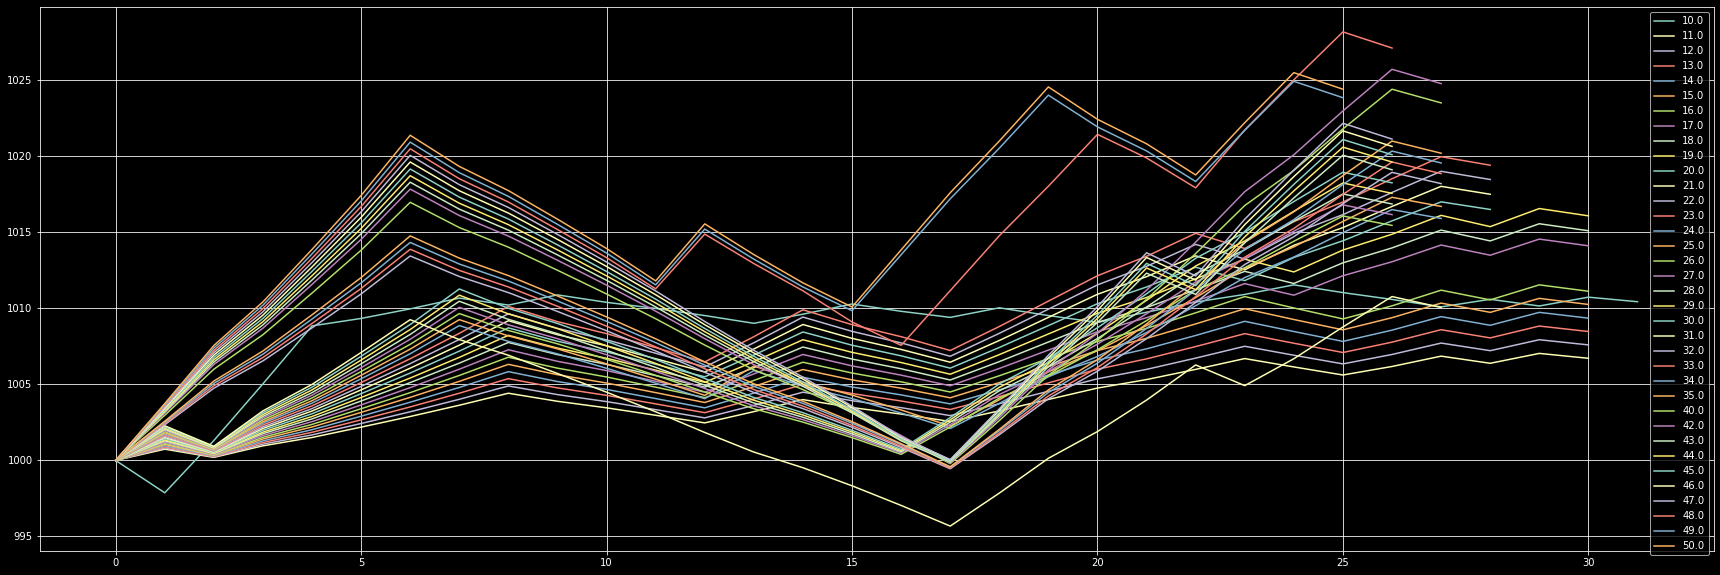

In [ ]:
walk2_test2_test = pd.DataFrame()
for i in range(len(test_walk2.iloc[:,-1].dropna())):
    clear_output(wait=True)
    print(f'{i}/{len(test_walk2.iloc[:,-1].dropna())}')
    result_test2 = bt.pct_backtest(test2, risco=risk, tksl=test_walk2['best_tksl'].iloc[i])
    walk2_test2_test[f"{test_walk2['best_tksl'].iloc[i]}"] = result_test2['result']
walk2_test2_test.plot()
plt.grid()

# Test 3

50/50


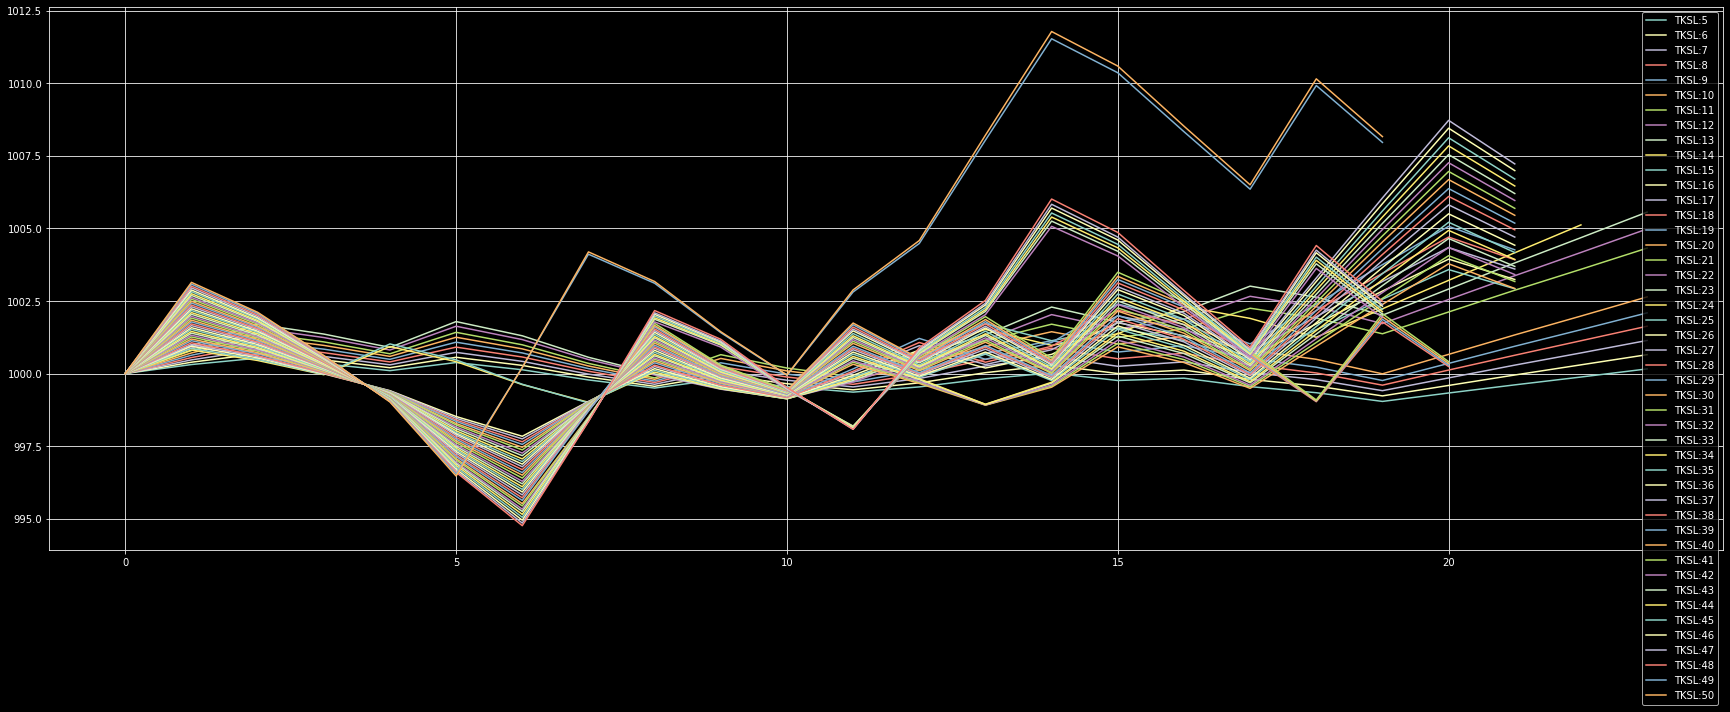

In [ ]:
test_walk3 = bt.pct_backtest(walk3, risco=risk, single=False, tot=51)
test_walk3.iloc[:,:-1].plot()
plt.grid()

23/24


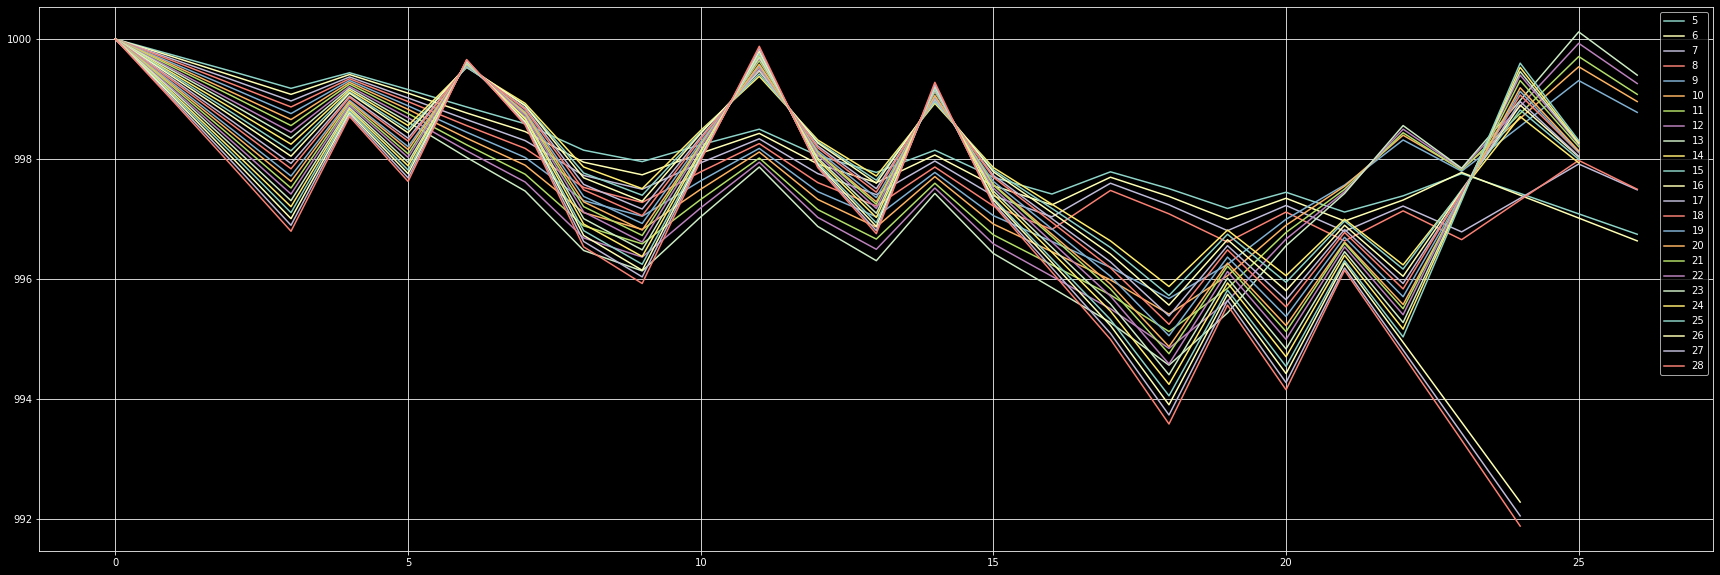

In [ ]:
walk3_test3_test = pd.DataFrame()
for i in range(len(test_walk3.iloc[:,-1].dropna())):
    clear_output(wait=True)
    print(f'{i}/{len(test_walk3.iloc[:,-1].dropna())}')
    result_test3 = bt.pct_backtest(test3, risco=risk, tksl=test_walk3['best_tksl'].iloc[i])
    walk3_test3_test[f"{test_walk3['best_tksl'].iloc[i]}"] = result_test3['result']
walk3_test3_test.plot()
plt.grid()

# Test 4

50/50


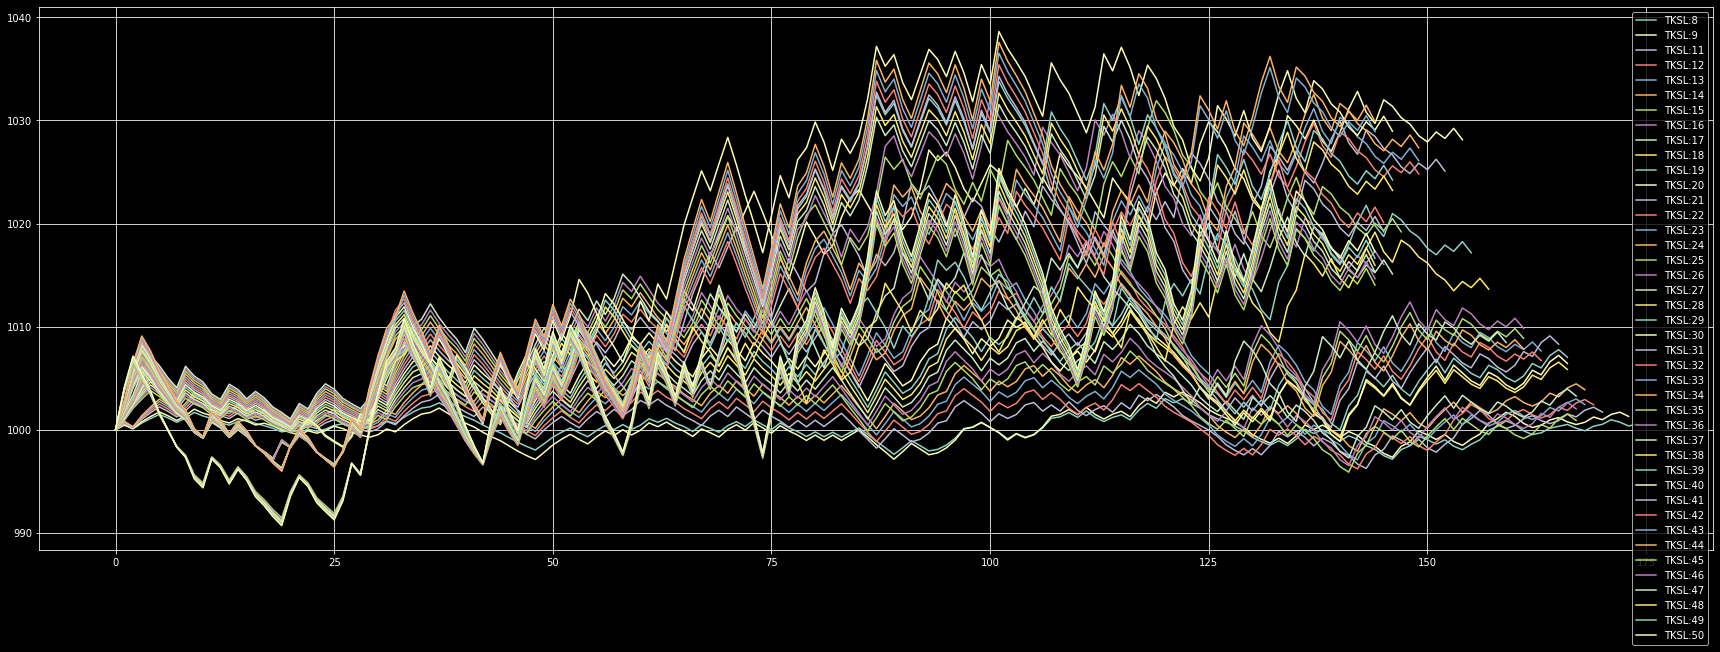

In [ ]:
test_walk4 = bt.pct_backtest(walk4, risco=risk, single=False, tot=51)
test_walk4.iloc[:,:-1].plot()
plt.grid()

41/42


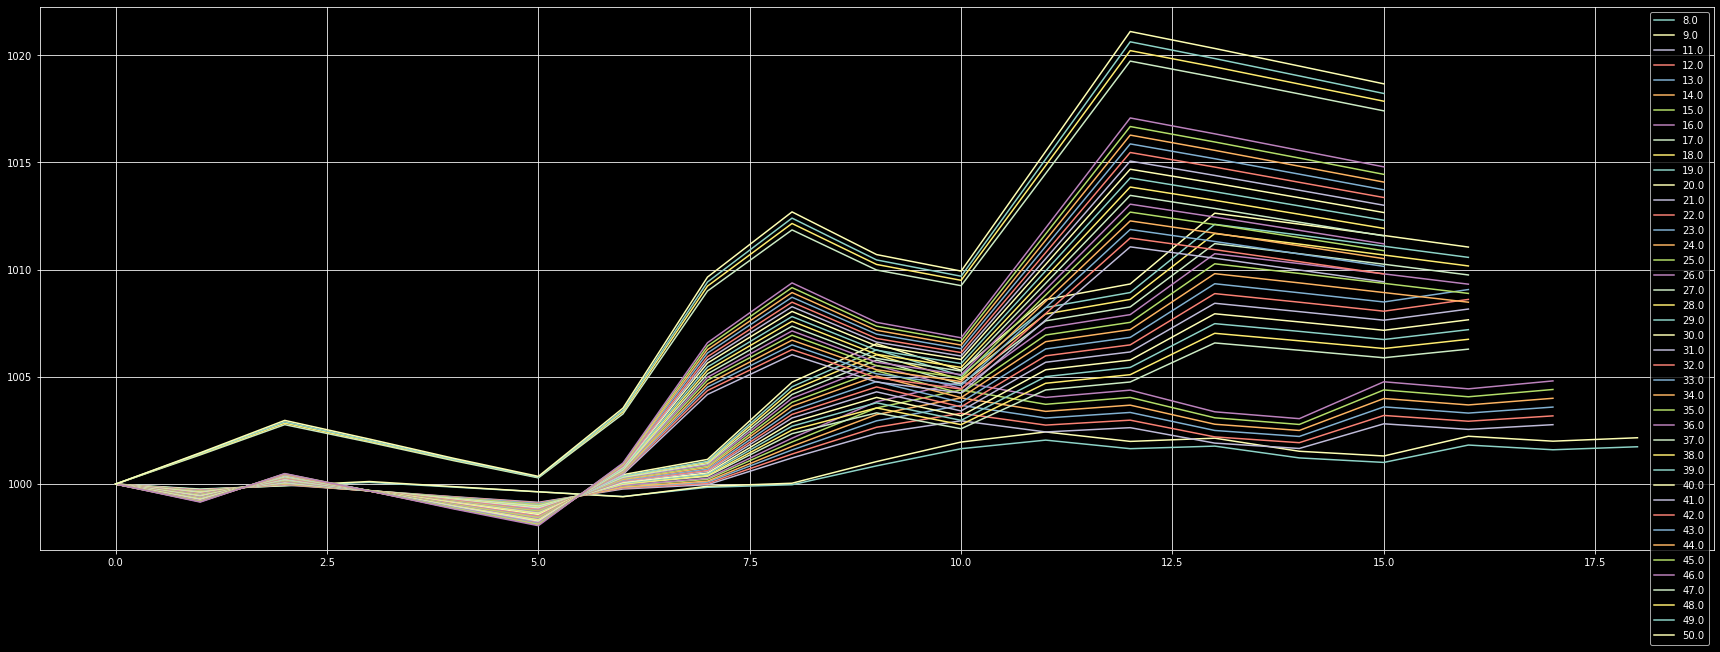

In [ ]:
walk4_test4_test = pd.DataFrame()
for i in range(len(test_walk4.iloc[:,-1].dropna())):
    clear_output(wait=True)
    print(f'{i}/{len(test_walk4.iloc[:,-1].dropna())}')
    result_test4 = bt.pct_backtest(test4, risco=risk, tksl=test_walk4['best_tksl'].iloc[i])
    walk4_test4_test[f"{test_walk4['best_tksl'].iloc[i]}"] = result_test4['result']
walk4_test4_test.plot()
plt.grid()

# Test 5

50/50


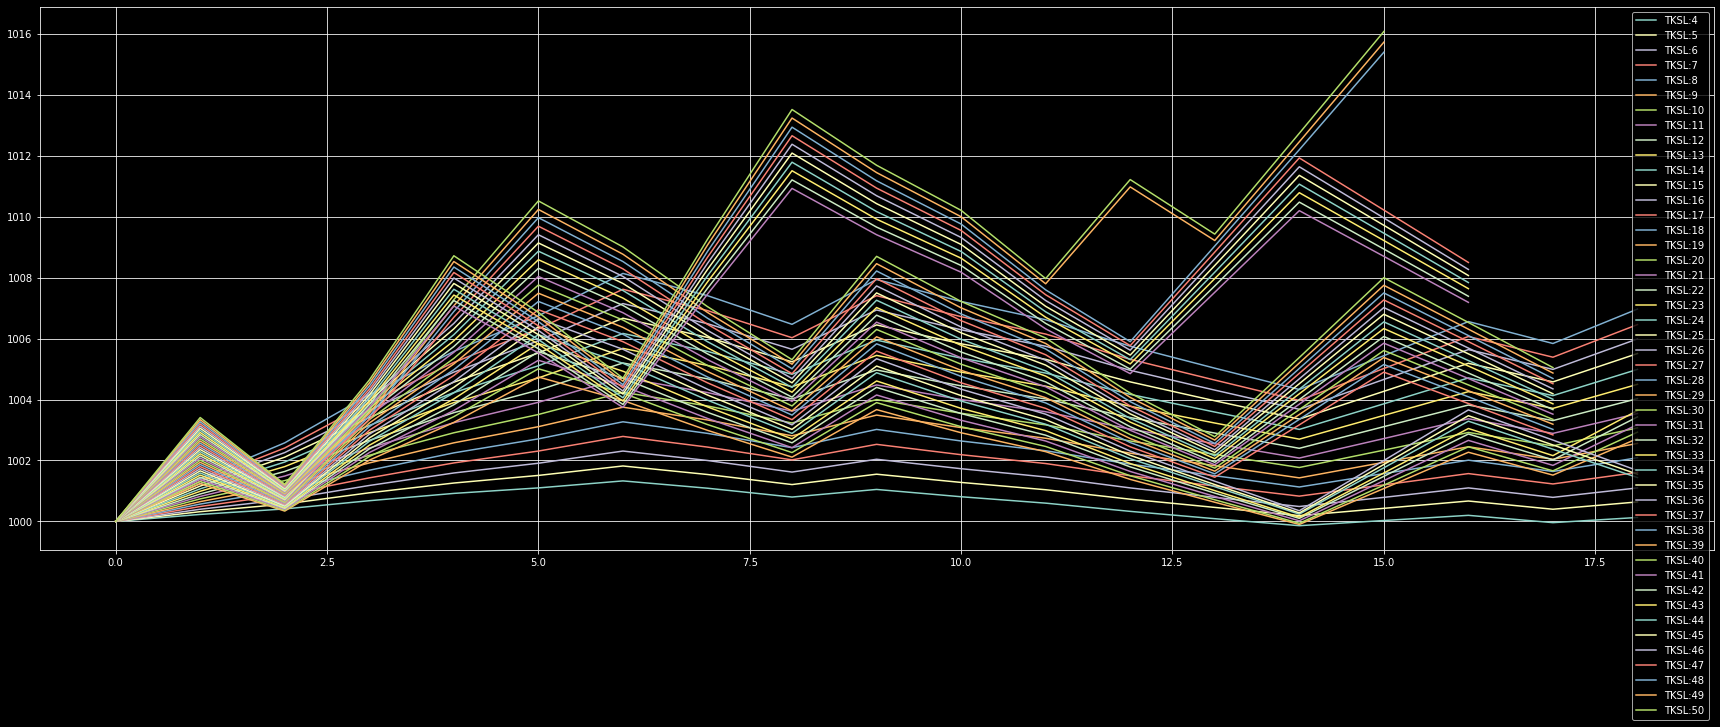

In [ ]:
test_walk5 = bt.pct_backtest(walk5, risco=risk, single=False, tot=51)
test_walk5.iloc[:,:-1].plot()
plt.grid()

18/19


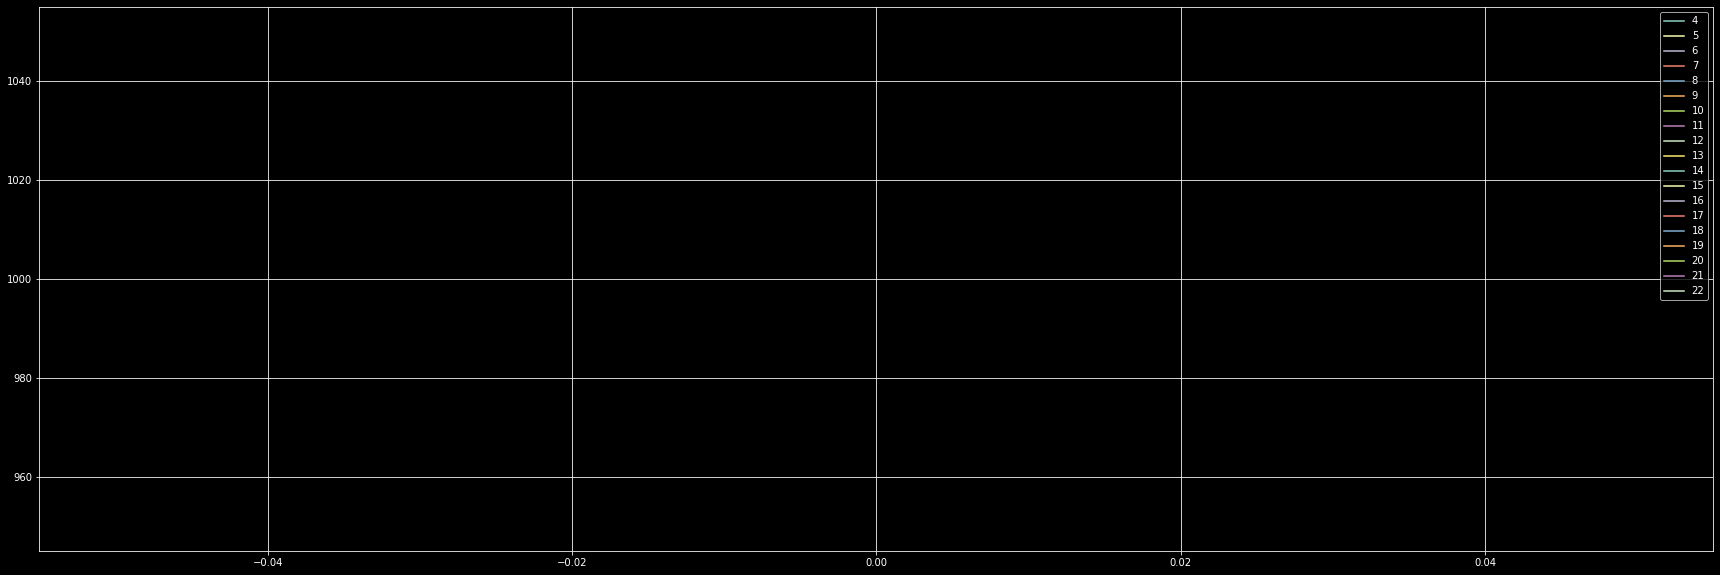

In [ ]:
walk5_test5_test = pd.DataFrame()
for i in range(len(test_walk5.iloc[:,-1].dropna())):
    clear_output(wait=True)
    print(f'{i}/{len(test_walk5.iloc[:,-1].dropna())}')
    result_test5 = bt.pct_backtest(test5, risco=risk, tksl=test_walk5['best_tksl'].iloc[i])
    walk5_test5_test[f"{test_walk5['best_tksl'].iloc[i]}"] = result_test5['result']
walk5_test5_test.plot()
plt.grid()

11/11


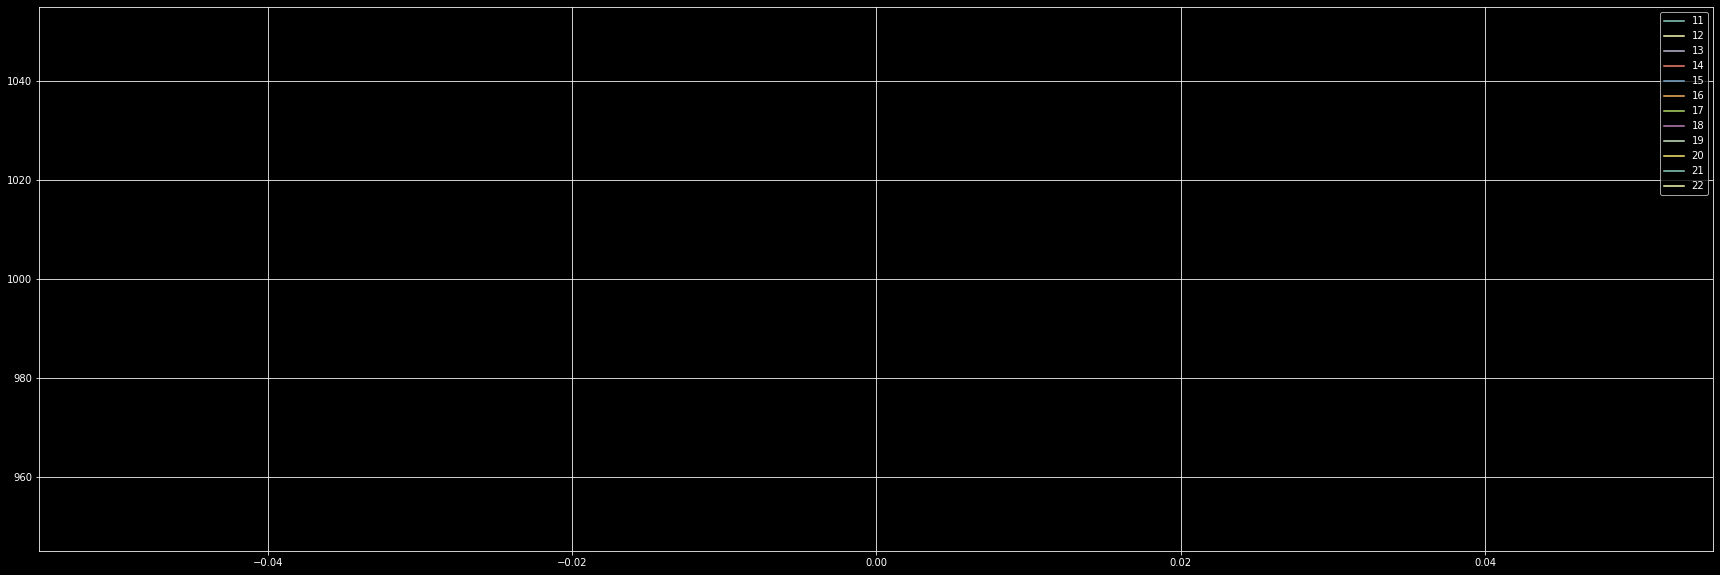

In [ ]:
x = af.compare(walk5_test5_test, walk4_test4_test, walk3_test3_test, walk2_test2_test, walk1_test1_test)
test_final = pd.DataFrame()
for i in range(len(x)):
    clear_output(wait=True)
    print(f'{i}/{len(x)-1}')
    final_result = bt.pct_backtest(test5, risco=risk, tksl=x[i])
    test_final[f"{x[i]}"] = final_result['result']
test_final.plot()
plt.grid()

# Regression for the best

In [ ]:
print(list(test_final.columns))

['11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']


22


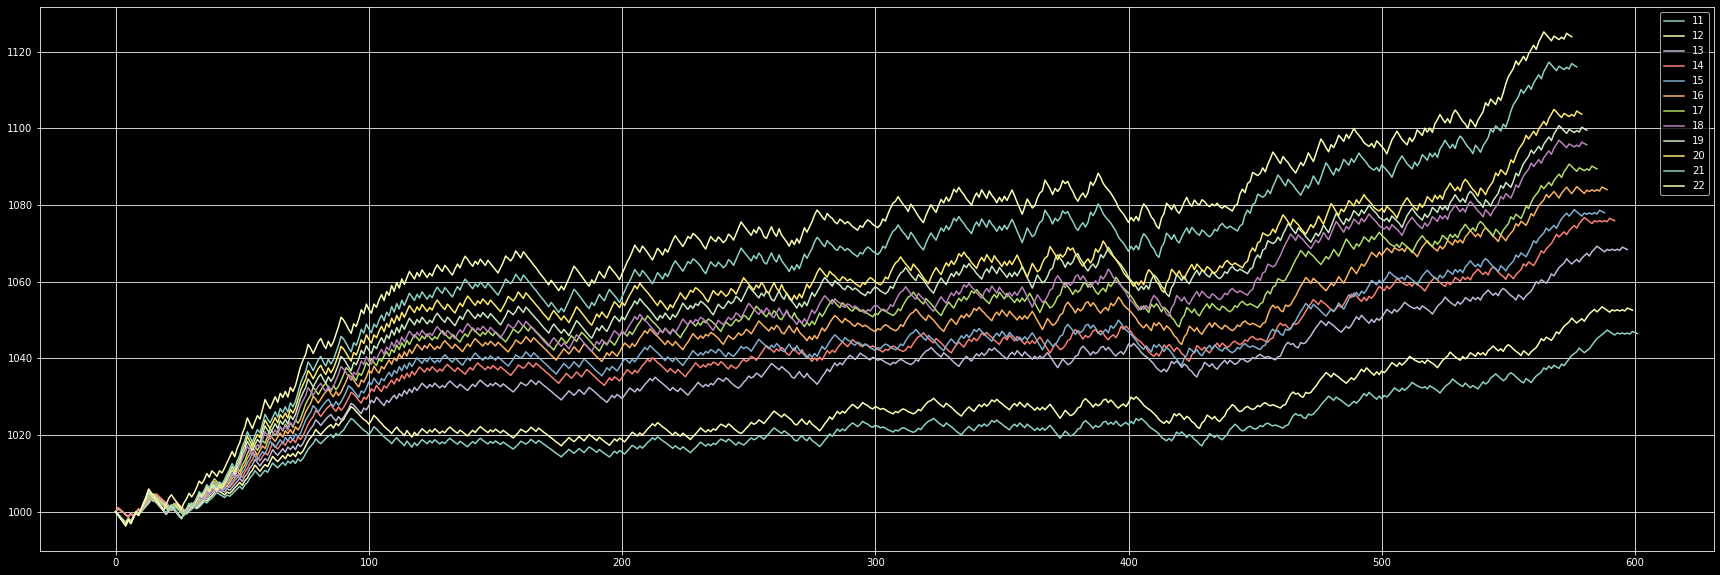

In [ ]:
single_final_test = pd.DataFrame()
for i in test_final.columns:
    clear_output(wait=True)
    print(f'{i}')
    a = bt.pct_backtest(data, risco=risk, tksl=int(i))
    single_final_test[f'{i}'] = a['result']
single_final_test.plot()
plt.grid()

In [ ]:
bests_results_lr = []
best_equity_lr = 1000
flag_new_high = True
for i in single_final_test.columns:
    lr_test = pd.DataFrame()
    lr_test['x'] = pd.Series(range(len(single_final_test[i].dropna())))
    lr_test['y'] = single_final_test[i].dropna()
    x_v = lr_test[['x']]
    y_v = lr_test[['y']]
    model = LinearRegression()
    model.fit(x_v, y_v)
    result = model.score(x_v, y_v)
    equity = single_final_test[i].dropna().iloc[-1]
    if result > 0.95:
        if flag_new_high:
            bests_results_lr.append(i)
            best_equity_lr = equity
            flag_new_high = False
        elif flag_new_high == False and equity > best_equity_lr:
            bests_results_lr.append(i)
            best_equity_lr = equity
single_final_test[bests_results_lr].plot()
plt.grid()

TypeError: no numeric data to plot

In [ ]:
bests_results_lr = []
cut = 0.0
for i in single_final_test.columns:
    lr_test = pd.DataFrame()
    lr_test['x'] = pd.Series(range(len(single_final_test[i].dropna())))
    lr_test['y'] = single_final_test[i].dropna()
    x_v = lr_test[['x']]
    y_v = lr_test[['y']]
    model = LinearRegression()
    model.fit(x_v, y_v)
    result = model.score(x_v, y_v)
    equity = single_final_test[i].dropna().iloc[-1]
    if result > cut:
        bests_results_lr.append(i)
        cut = result
single_final_test[bests_results_lr].plot()
plt.grid()

In [ ]:
from itertools import combinations_with_replacement

In [ ]:
comb = list(combinations_with_replacement([2, 3, 5, 7, 8, 13, 21, 24], 2))

In [ ]:
len(comb)

36